<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Introduction to Natural Language Processing: Vectorizers & Sequential NLP</center></font></h1>
<h1><center>Twitter US Airline Sentiment</center></h1>
<h3><center>Charlcye Mitchell, April 2023</center></h3>

#Problem Definition
Defining the problem, Importing the libraries, loading and description of the data.
- Problem statement 
- Import the library 
- Read the dataset 
- Check the shape of the data 
- Check the missing values

##Context
Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

##Objective
- Perform sentiment analysis about the problems of each major U.S. airline.

##Data Dictionary

Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset has the following columns:
*  tweet_id                                                           
*  airline_sentiment                                               
*  airline_sentiment_confidence                               
*  negativereason                                                   
*  negativereason_confidence                                    
*  airline                                                                    
*  airline_sentiment_gold                                              
*  name     
*  negativereason_gold 
*  retweet_count
*  text
*  tweet_coord
*  tweet_created
*  tweet_location 
*  user_timezone


###Importing the necessary packages

In [1]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re



from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC



from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###Reading the Datasets

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read in the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets.csv')

In [4]:
# looking at head (5 observations) 
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# count the rows and columns
df.shape

(14640, 15)

In [6]:
# check the null counts and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

In [8]:
df.isnull().values.any() # If there are any null values in data set

True

#Exploratory Data Analysis

- Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
- Plot the distribution of sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
- Plot the word cloud graph of tweets for positive and negative sentiment separately.

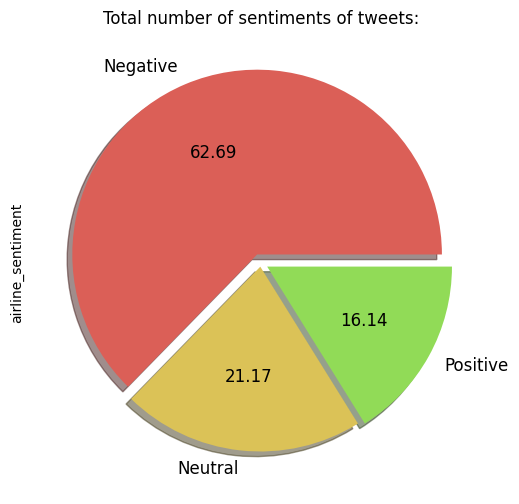

In [11]:
# Create a pie chart of the sentiment distribution
plt.figure(figsize=(6, 6))
colors = sns.color_palette("hls", 8)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',
                                                        colors=colors,
                                                        labels=['Negative','Neutral','Positive'],
                                                        explode=[0.05, 0.02, 0.04],
                                                        shadow=True,
                                                        autopct='%.2f',
                                                        fontsize=12,
                                                        title="Total Tweets for Each Sentiment")
plt.title("Total number of sentiments of tweets:")

plt.show()

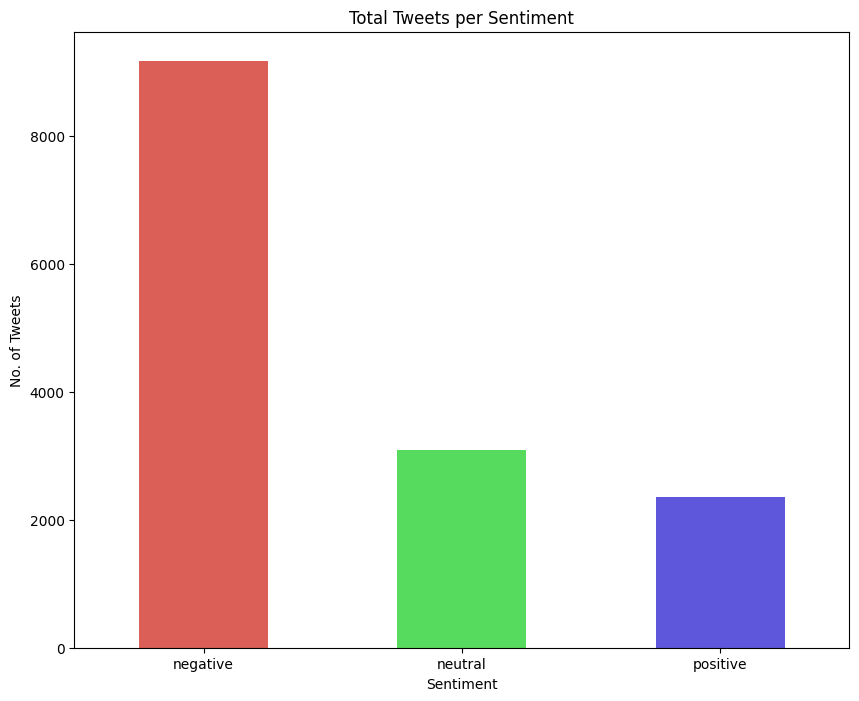

In [12]:
# Create a bar chart of the total number of tweets per airline
colors = sns.color_palette("hls", 3)
pd.Series(df['airline_sentiment']).value_counts().plot(kind="bar",
                                                        color=colors,
                                                        figsize=(10, 8),
                                                        fontsize=10,
                                                        rot=0,
                                                        title='Total Tweets per Sentiment')
plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

plt.show()


Total sentiment tweets per airline:
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


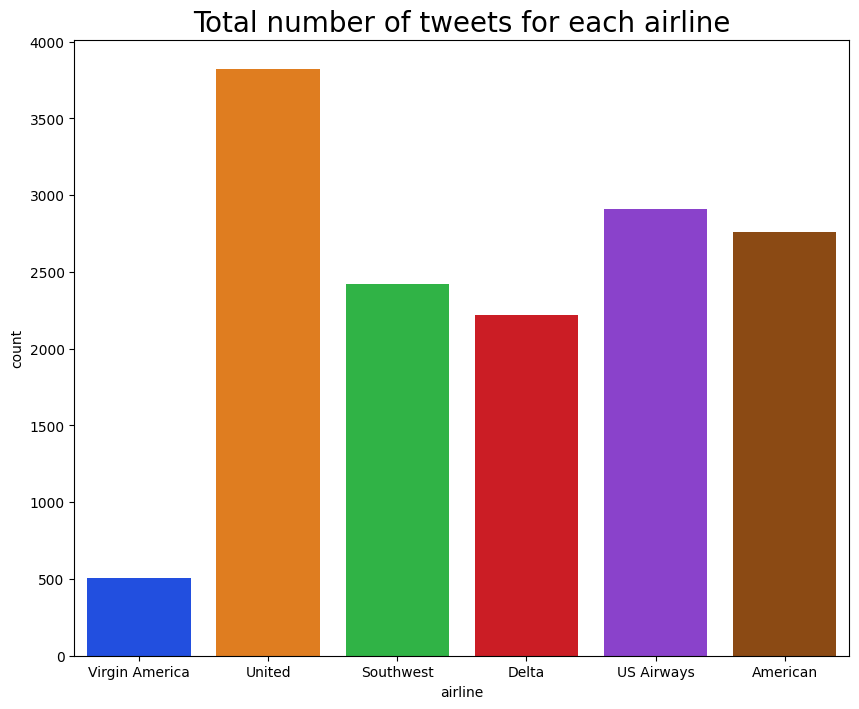

Total sentiment tweets for selected airlines:
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [13]:
# Print the total number of sentiment tweets per airline
cprint("Total sentiment tweets per airline:",'green')
print(df.groupby('airline')['airline_sentiment'].count())

# Create a countplot of the total number of tweets for each airline
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='airline', data=df, palette='bright')
ax.set_title(label='Total number of tweets for each airline', fontsize=20)
plt.show()

# Print the total number of sentiment tweets for a selected list of airlines
cprint("Total sentiment tweets for selected airlines:", 'green')
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for i in airlines:
    print('{} : \n'.format(i), df.loc[df.airline == i].airline_sentiment.value_counts())


In [15]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

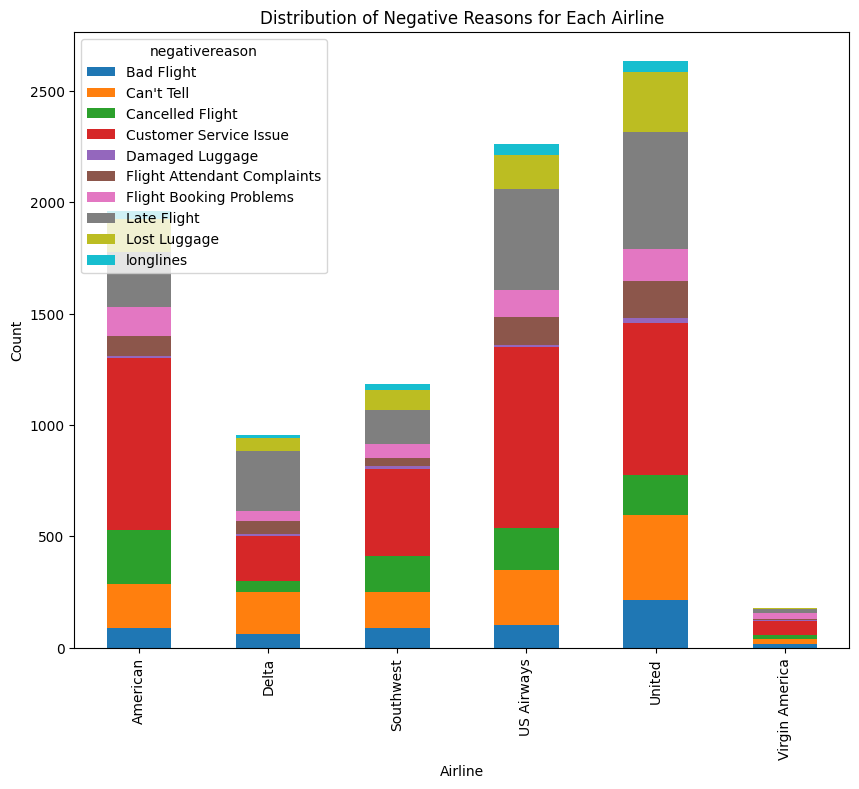

In [40]:
df.groupby(['airline', 'negativereason']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Distribution of Negative Reasons for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()


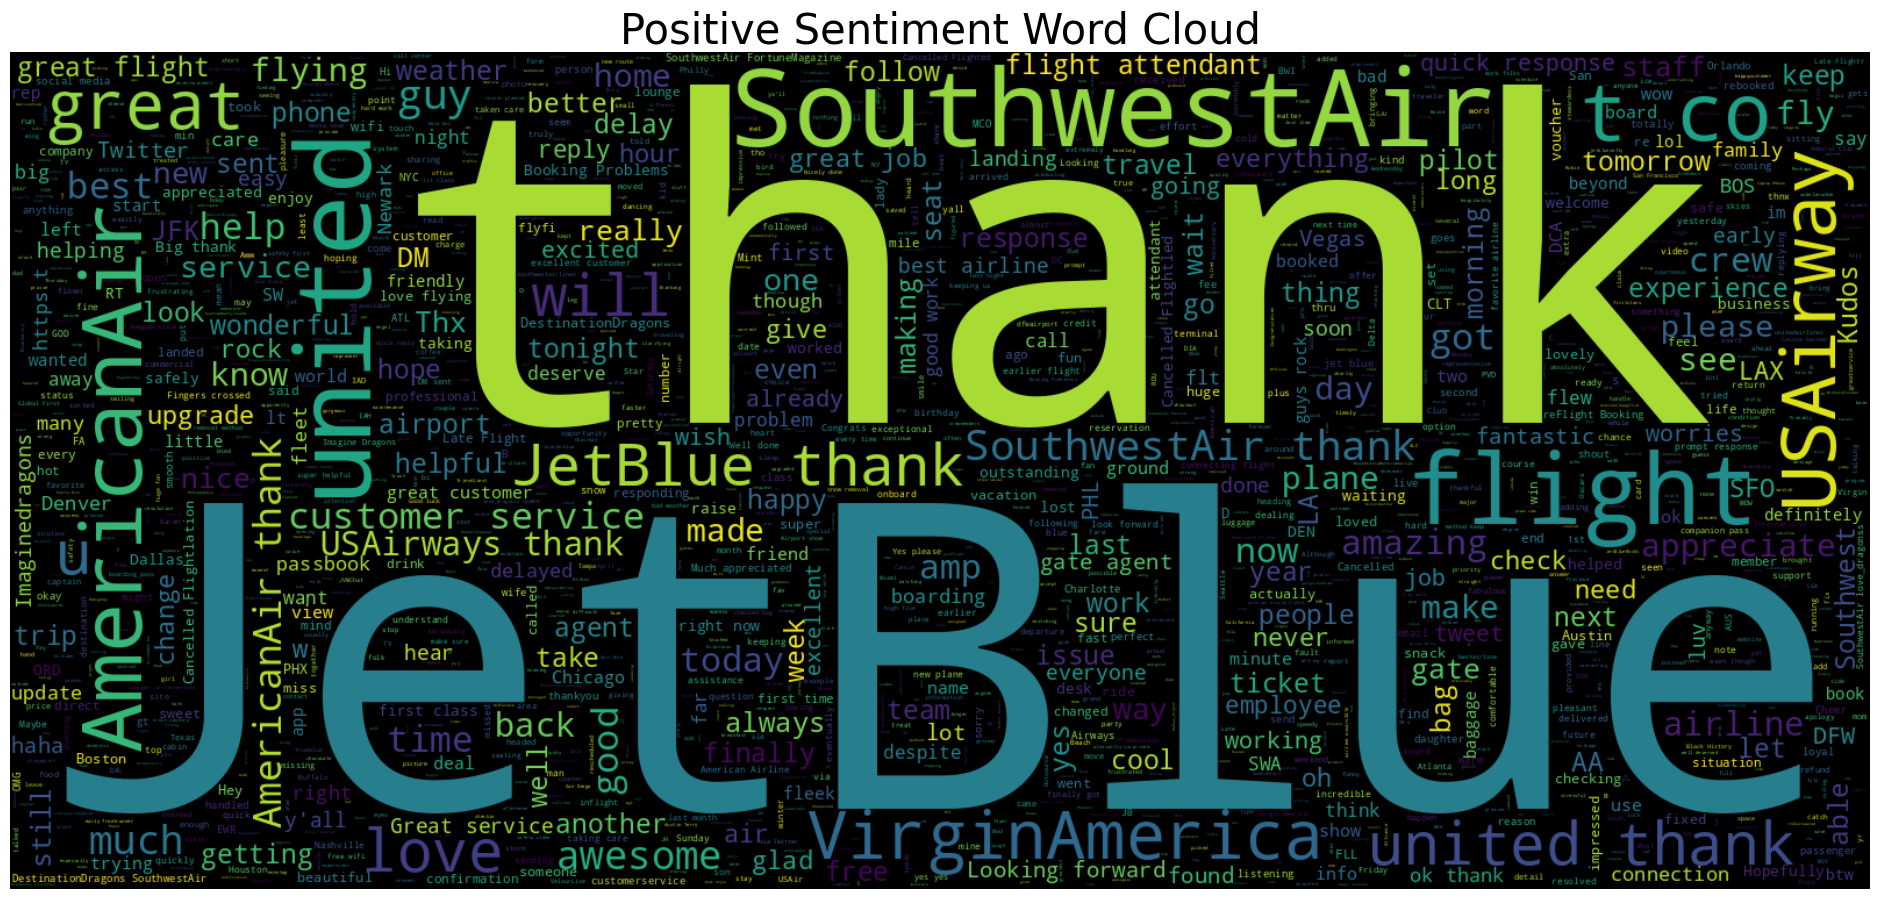

In [16]:
# Positive Word Cloud

# Generate the word cloud with a color scheme
word_cloud_positive = WordCloud(min_font_size=3, max_words=3200, width=1600, height=720, colormap='viridis').generate(" ".join(positive))

# Create the plot and add a title
plt.figure(figsize=(24, 12))
plt.imshow(word_cloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=30)

# Show the plot
plt.show()

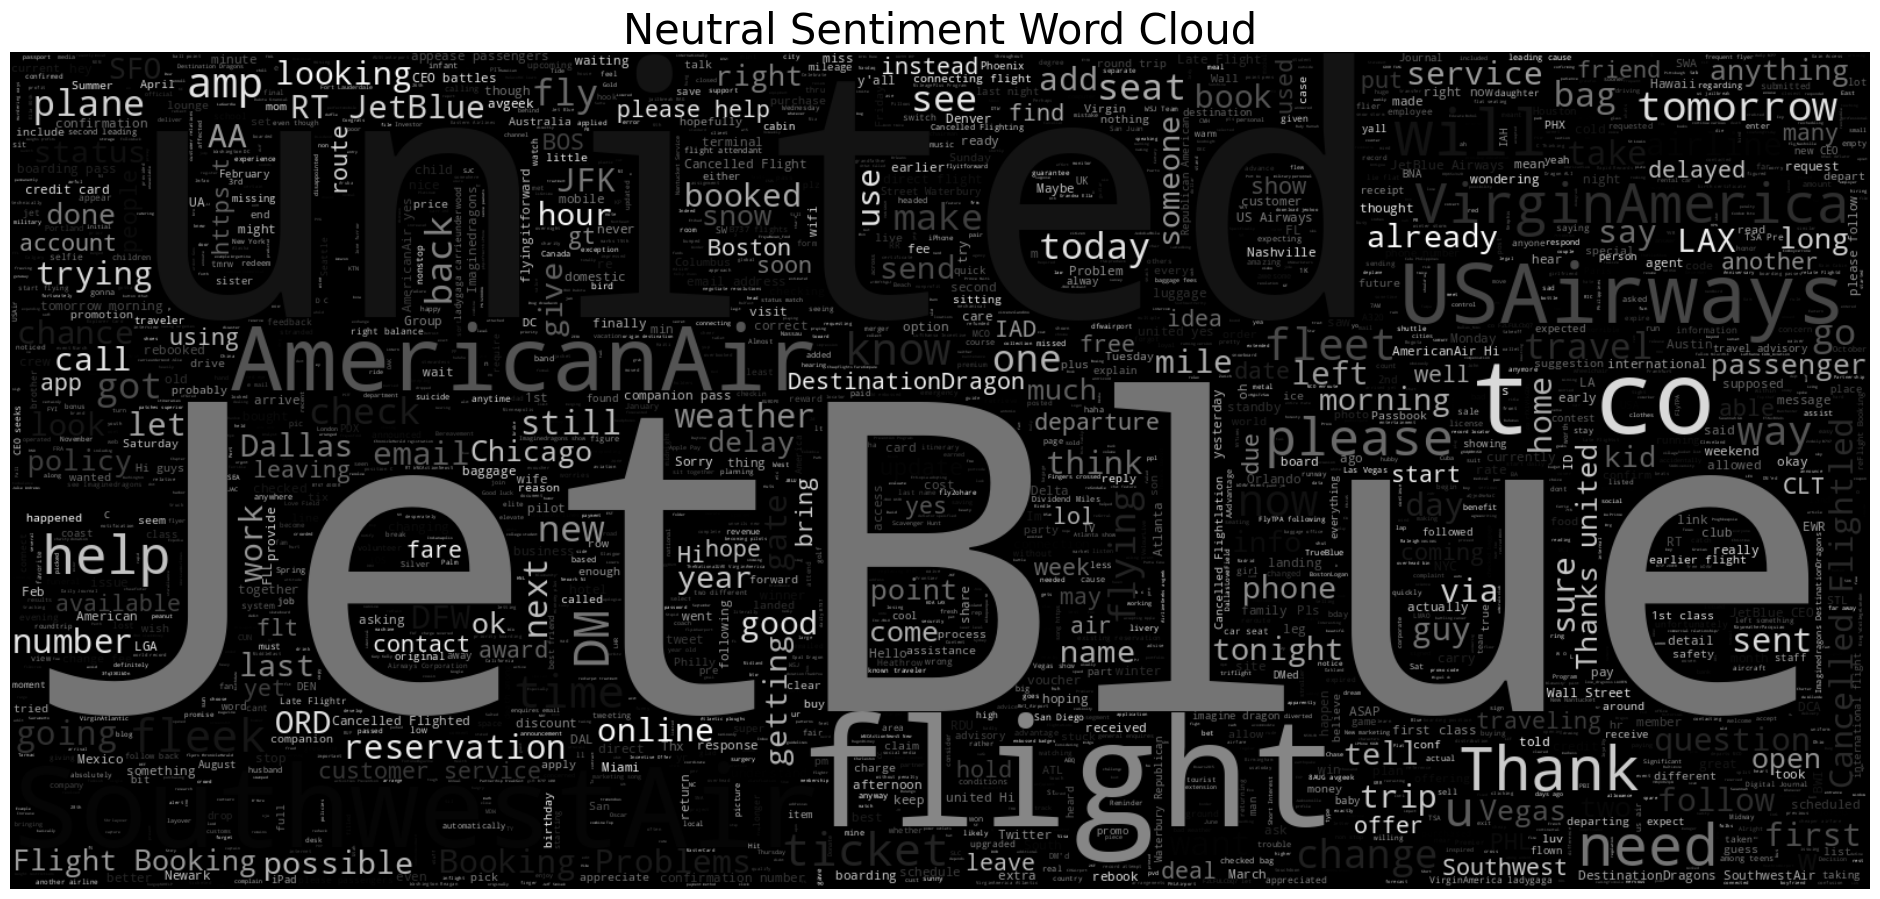

In [17]:
# Neutral Word Cloud

# Generate the word cloud with a color scheme
word_cloud_neutral = WordCloud(min_font_size=3, max_words=3200, width=1600, height=720, colormap='gray').generate(" ".join(neutral))

# Create the plot and add a title
plt.figure(figsize=(24, 12))
plt.imshow(word_cloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud', fontsize=30)

# Show the plot
plt.show()

In [19]:
# Negative Word Cloud

# Generate the word cloud with a color scheme
wordcloud_neg = WordCloud(min_font_size=3, max_words=3200, width=1600, height=720, colormap='inferno').generate(" ".join(negative))

# Create the plot and add a title
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=30)

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Data Preprocessing
- Pre-process the text data for classification 
-- a. Html tag removal. 
-- b. Tokenization. 
-- c. Remove the numbers. 
-- d. Removal of Special Characters and Punctuations. 
-- e. Removal of stopwords 
-- f. Conversion to lowercase. 
-- g. Lemmatize or stemming. 
-- h. Join the words in the list to convert them back to text string in the data frame. 
- Print the first 5 rows of data after pre-processing.

In [20]:
# Convert sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [21]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [22]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [23]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize NLTK's Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform all the pre-processing steps
def preprocess_text(text):
    # Remove @username
    text = re.sub('@[^\s]+','',text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove HTML tags
    html = re.compile(r'<.*?>')
    text = html.sub(r'', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\b', ' ')
    text = text.replace('\f', ' ')
    text = text.replace('\a', ' ')
    text = text.replace('\v', ' ')
    text = text.replace('\r\n', ' ')
    text = text.replace('\n\r', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\n', ' ')
    text = text.replace('  ', ' ')
    text = text.replace('  ', ' ')
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens to form the preprocessed text
    text = ' '.join(tokens)
    
    return text

# Apply the preprocess_text function to each text in the DataFrame
df['final_text'] = df['text'].apply(preprocess_text)

# Print the first 5 rows of the preprocessed data
print(df['final_text'].head(5))


0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: final_text, dtype: object


In [24]:
X = df['final_text']
y = df['airline_sentiment']

Text Vectorization
- a. Use CountVectorizer. 
- b. Use TfidfVectorizer. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model.

In [25]:
# Create a CountVectorizer object
cv = CountVectorizer()

# Fit and transform the data
X_final = cv.fit_transform(X)

In [26]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [27]:
# Handling imbalanced data using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

#Model Building and Evaluation
- Fit the model using vectorized column 
- Cross-validate the model performance 
- Evaluate the model using confusion matrix 
- Print the top 40 features and plot their word cloud using both types of vectorization.

In [41]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

##Random Forest Classifier

In [42]:
# Train a Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
random_forest_classifier_prediction = rfc.predict(X_test)

# Calculate the accuracy score of the Random Forest classifier predictions
acc_score = accuracy_score(random_forest_classifier_prediction, y_test)
print('Accuracy score:', acc_score)

Accuracy score: 0.8739105171411969


## XGB Classifier

In [43]:
# Train an XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test set
xgb_prediction = xgb.predict(X_test)

# Calculate the accuracy score of the XGBClassifier predictions
acc_score = accuracy_score(xgb_prediction, y_test)
print('Accuracy score:', acc_score)

Accuracy score: 0.8094131319000581


## Gradient Boost Classifier

In [44]:
# Train a GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Make predictions on the test set
gbc_prediction = gbc.predict(X_test)

# Calculate the accuracy score of the GradientBoostingClassifier predictions
acc_score = accuracy_score(gbc_prediction, y_test)
print('Accuracy score:', acc_score)

Accuracy score: 0.7427367809413132


## Naive Bayes

In [45]:
# Train a MultinomialNB classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
nb_prediction = nb.predict(X_test)

# Calculate the accuracy score of the MultinomialNB classifier predictions
acc_score = accuracy_score(nb_prediction, y_test)
print('Accuracy score:', acc_score)

Accuracy score: 0.8059267867518884


## Support Vector Machine

In [46]:
# Train an SVC classifier
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test set
svc_prediction = svc.predict(X_test)

# Calculate the accuracy score of the SVC classifier predictions
acc_score = accuracy_score(svc_prediction, y_test)
print('Accuracy score:', acc_score)

Accuracy score: 0.8602556653108657


## Decision Tree

In [47]:
# Train a DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_prediction = dt.predict(X_test)

# Calculate the accuracy score of the DecisionTreeClassifier predictions
acc_score = accuracy_score(dt_prediction, y_test)
print('Accuracy score:', acc_score)

Accuracy score: 0.8115920976176642


##Confusion Matrix

In [56]:
#Confusion Matrix
cr = classification_report(y_test, random_forest_classifier_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      2343
           1       0.84      0.86      0.85      2264
           2       0.92      0.91      0.92      2277

    accuracy                           0.87      6884
   macro avg       0.87      0.87      0.87      6884
weighted avg       0.87      0.87      0.87      6884



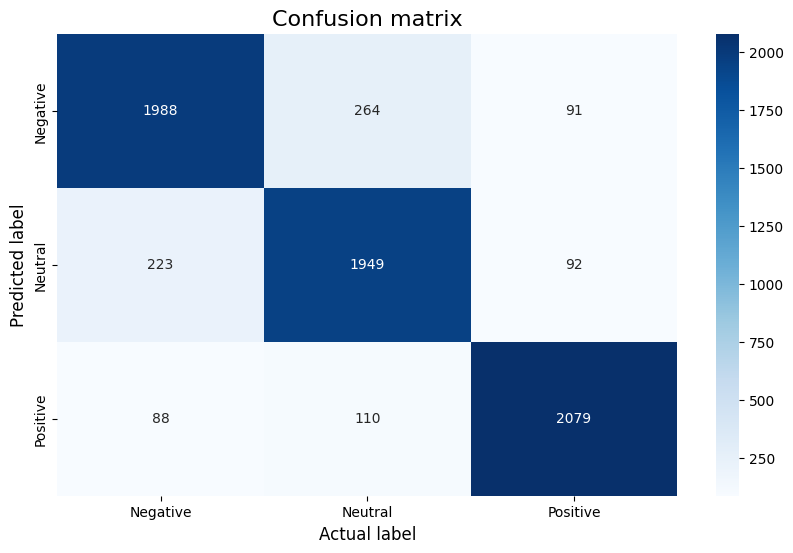

In [57]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,random_forest_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Print the top 40 features and plot their word cloud using both types of vectorization.

In [59]:
# Get the feature names
feature_names = cv.get_feature_names_out()

# Get the feature importances from the Random Forest classifier
importances = rfc.feature_importances_

# Combine feature names and their importances into a list of tuples
features_importances = list(zip(feature_names, importances))

# Sort the list by importance, descending
sorted_features_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Get the top 40 features
top_40_features = sorted_features_importances[:40]

# Print the top 40 features
print("Top 40 features:")
for feature, importance in top_40_features:
    print(f"{feature}: {importance}")


Top 40 features:
thanks: 0.047247424760019995
thank: 0.040156783302484664
great: 0.01550574608714232
flight: 0.015380404027251507
hour: 0.014034857790710653
awesome: 0.0077370233614211135
love: 0.007291149145786982
bag: 0.00711186636410224
customer: 0.006978077733353346
get: 0.006784342990398432
best: 0.006415684983797155
cancelled: 0.006358955863120486
service: 0.005844358402797079
hold: 0.0058325261948525085
delayed: 0.005545839934334957
time: 0.005046304111703029
still: 0.005043317235335732
amazing: 0.00488709579852769
plane: 0.004742459167575747
delay: 0.004732294547140567
need: 0.004595318723987943
dont: 0.0044175986945350545
appreciate: 0.004405948289275813
day: 0.0043920052444633255
call: 0.004371270941061908
good: 0.004365079081655814
hr: 0.004341989586782826
airline: 0.004321873447071189
cant: 0.004257665204783378
never: 0.004142632993009502
much: 0.003981447891047427
dm: 0.0037879080181624576
please: 0.0036927100222860047
agent: 0.0035228000011716925
im: 0.0033828546827026694

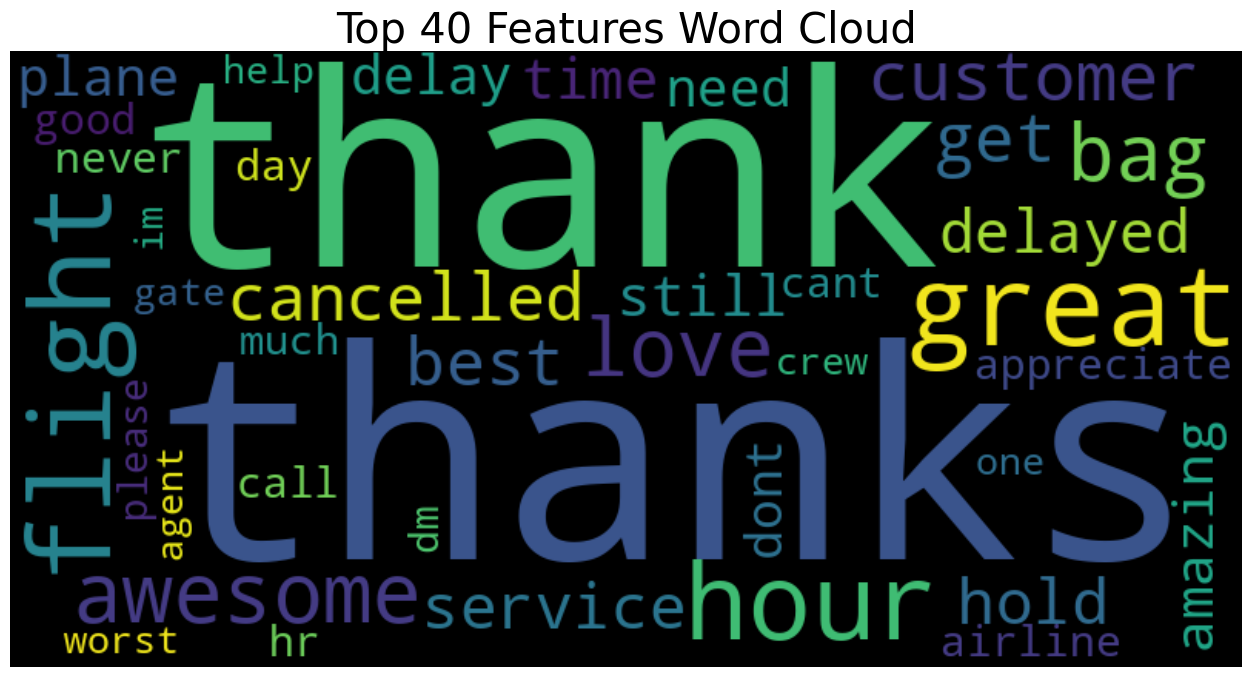

In [60]:
# Generate the word cloud with a color scheme
wordcloud_top_40 = WordCloud(min_font_size=3, max_words=40, width=800, height=400, colormap='viridis').generate_from_frequencies(dict(top_40_features))

# Create the plot and add a title
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_top_40, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Features Word Cloud', fontsize=30)

# Show the plot
plt.show()


# Summary

It appears that US Airways, United, and Americana Airlines have been receiving negative reviews lately, primarily due to delays and service quality issues. These airlines should address these concerns to maintain their customer base and avoid further damage to their reputation.

On a positive note, it's encouraging to see that when customers have had positive experiences with these airlines, they are taking to Twitter to express their appreciation. This demonstrates that despite recent challenges, the airlines still have the potential to deliver excellent service.

To improve customer satisfaction, these airlines should focus on reducing delays and enhancing service quality. They could do this by investing in better infrastructure, streamlining operational processes, and providing comprehensive training to their staff. Additionally, they should maintain open communication with their customers, taking feedback seriously and implementing changes based on customer suggestions.

By acknowledging and addressing the issues causing negative reviews, US Airways, United, and Americana can work towards rebuilding their reputation and ensuring that more passengers have positive experiences to share on social media.